We will use baysian, IterSVD, Matrix Factorization, Soft impute 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

from sklearn.model_selection import train_test_split
from fancyimpute import IterativeSVD, SoftImpute

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [4]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_combined = pd.concat([X_train, X_test], axis=0)

In [5]:
# Initialize IterativeSVD for imputation
iterative_svd = IterativeSVD()
softimpute = SoftImpute()

# Perform IterativeSVD Imputation on the combined dataset
X_combined_imputed_iterative = iterative_svd.fit_transform(X_combined)
X_train_imputed_iterative = X_combined_imputed_iterative[:len(X_train), :]
X_test_imputed_iterative = X_combined_imputed_iterative[len(X_train):, :]

# Perform SoftImpute on the combined dataset
X_combined_imputed_soft = softimpute.fit_transform(X_combined)
X_train_imputed_soft = X_combined_imputed_soft[:len(X_train), :]
X_test_imputed_soft = X_combined_imputed_soft[len(X_train):, :]

[IterativeSVD] Iter 1: observed MAE=290.522514
[IterativeSVD] Iter 2: observed MAE=197.616056
[IterativeSVD] Iter 3: observed MAE=28.356853
[IterativeSVD] Iter 4: observed MAE=1.697254
[IterativeSVD] Iter 5: observed MAE=0.503289
[SoftImpute] Max Singular Value of X_init = 403977.444542
[SoftImpute] Iter 1: observed MAE=72.138084 rank=5
[SoftImpute] Iter 2: observed MAE=72.589102 rank=5
[SoftImpute] Iter 3: observed MAE=71.705811 rank=4
[SoftImpute] Iter 4: observed MAE=71.252901 rank=4
[SoftImpute] Iter 5: observed MAE=71.013974 rank=4
[SoftImpute] Iter 6: observed MAE=70.906418 rank=4
[SoftImpute] Iter 7: observed MAE=70.862595 rank=4
[SoftImpute] Iter 8: observed MAE=70.841562 rank=4
[SoftImpute] Iter 9: observed MAE=70.832763 rank=4
[SoftImpute] Iter 10: observed MAE=70.830568 rank=4
[SoftImpute] Iter 11: observed MAE=70.832055 rank=4
[SoftImpute] Iter 12: observed MAE=70.835160 rank=4
[SoftImpute] Iter 13: observed MAE=70.838895 rank=4
[SoftImpute] Iter 14: observed MAE=70.842834 

In [6]:
X_train_imputed_svd = pd.DataFrame(X_train_imputed_iterative, columns=X_train.columns)
X_test_imputed_svd = pd.DataFrame(X_test_imputed_iterative, columns=X_test.columns)

X_train_imputed_sm = pd.DataFrame(X_train_imputed_soft, columns=X_train.columns)
X_test_imputed_sm = pd.DataFrame(X_test_imputed_soft, columns=X_test.columns)

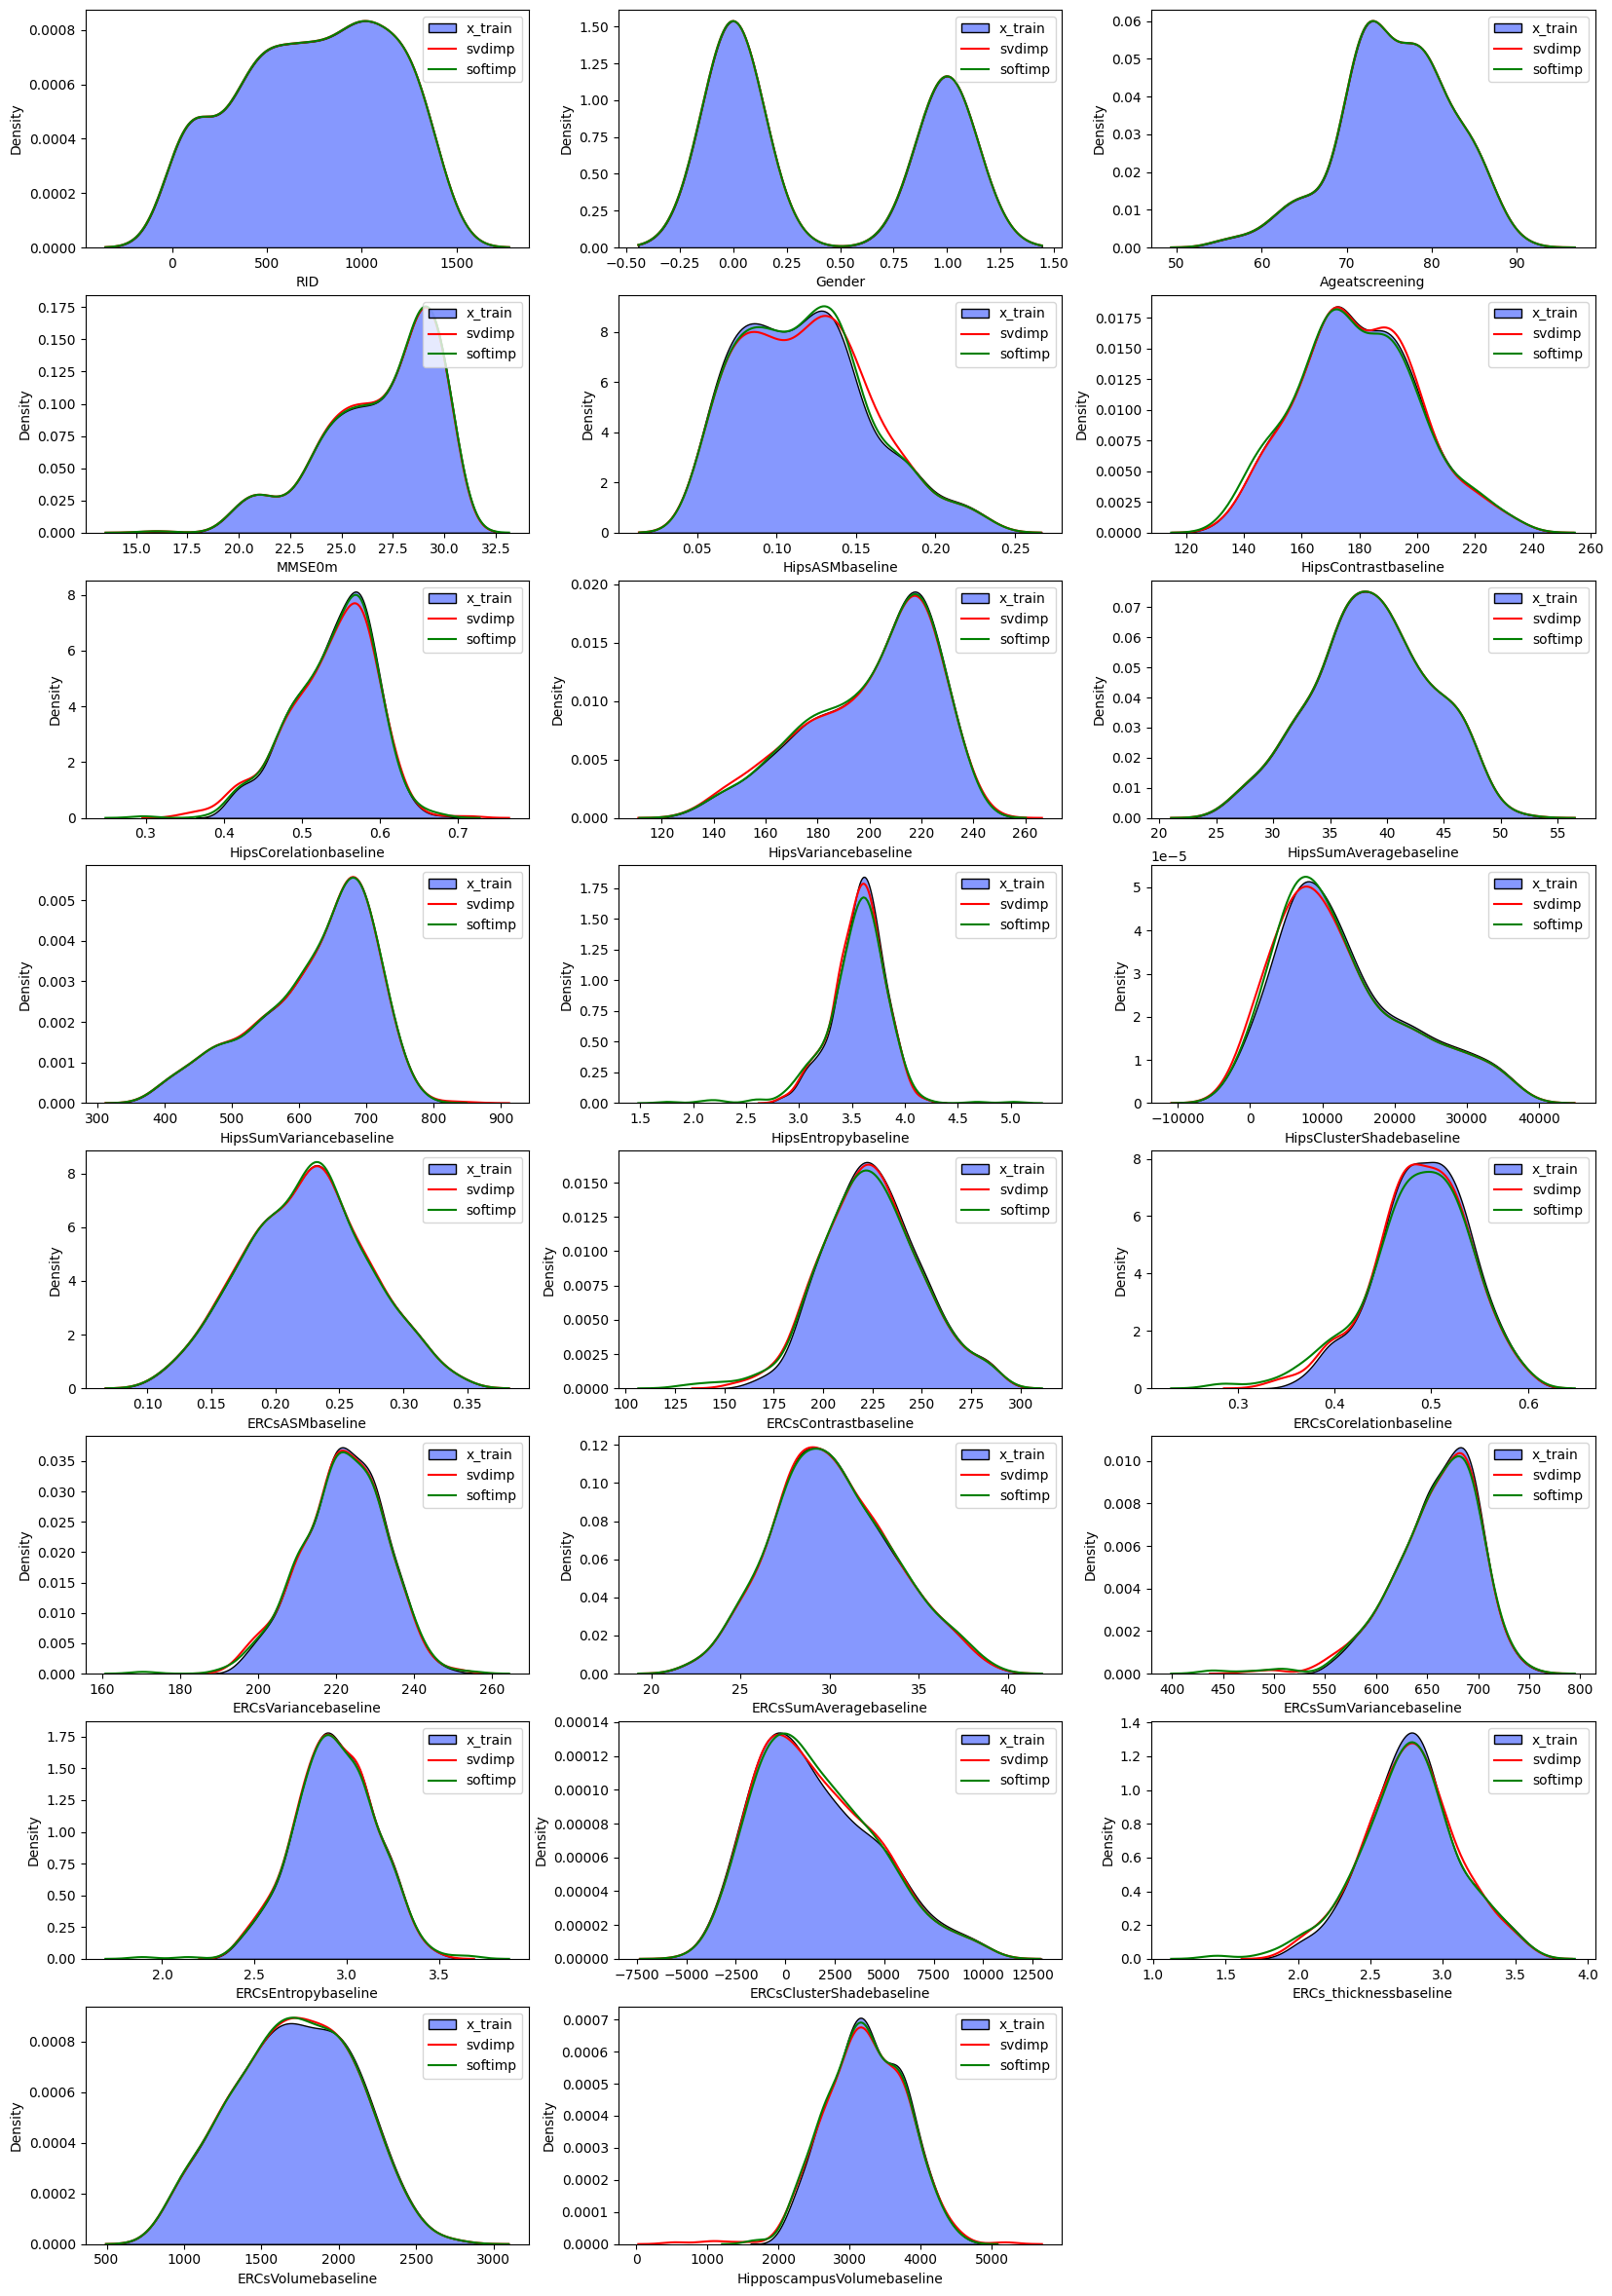

In [7]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train[X_train.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_imputed_svd[X_train_imputed_svd.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_imputed_sm[X_train_imputed_sm.columns[i]], color= "green")
    
    labels = ['x_train', 'svdimp', 'softimp']
    plt.legend(labels, loc='upper right')

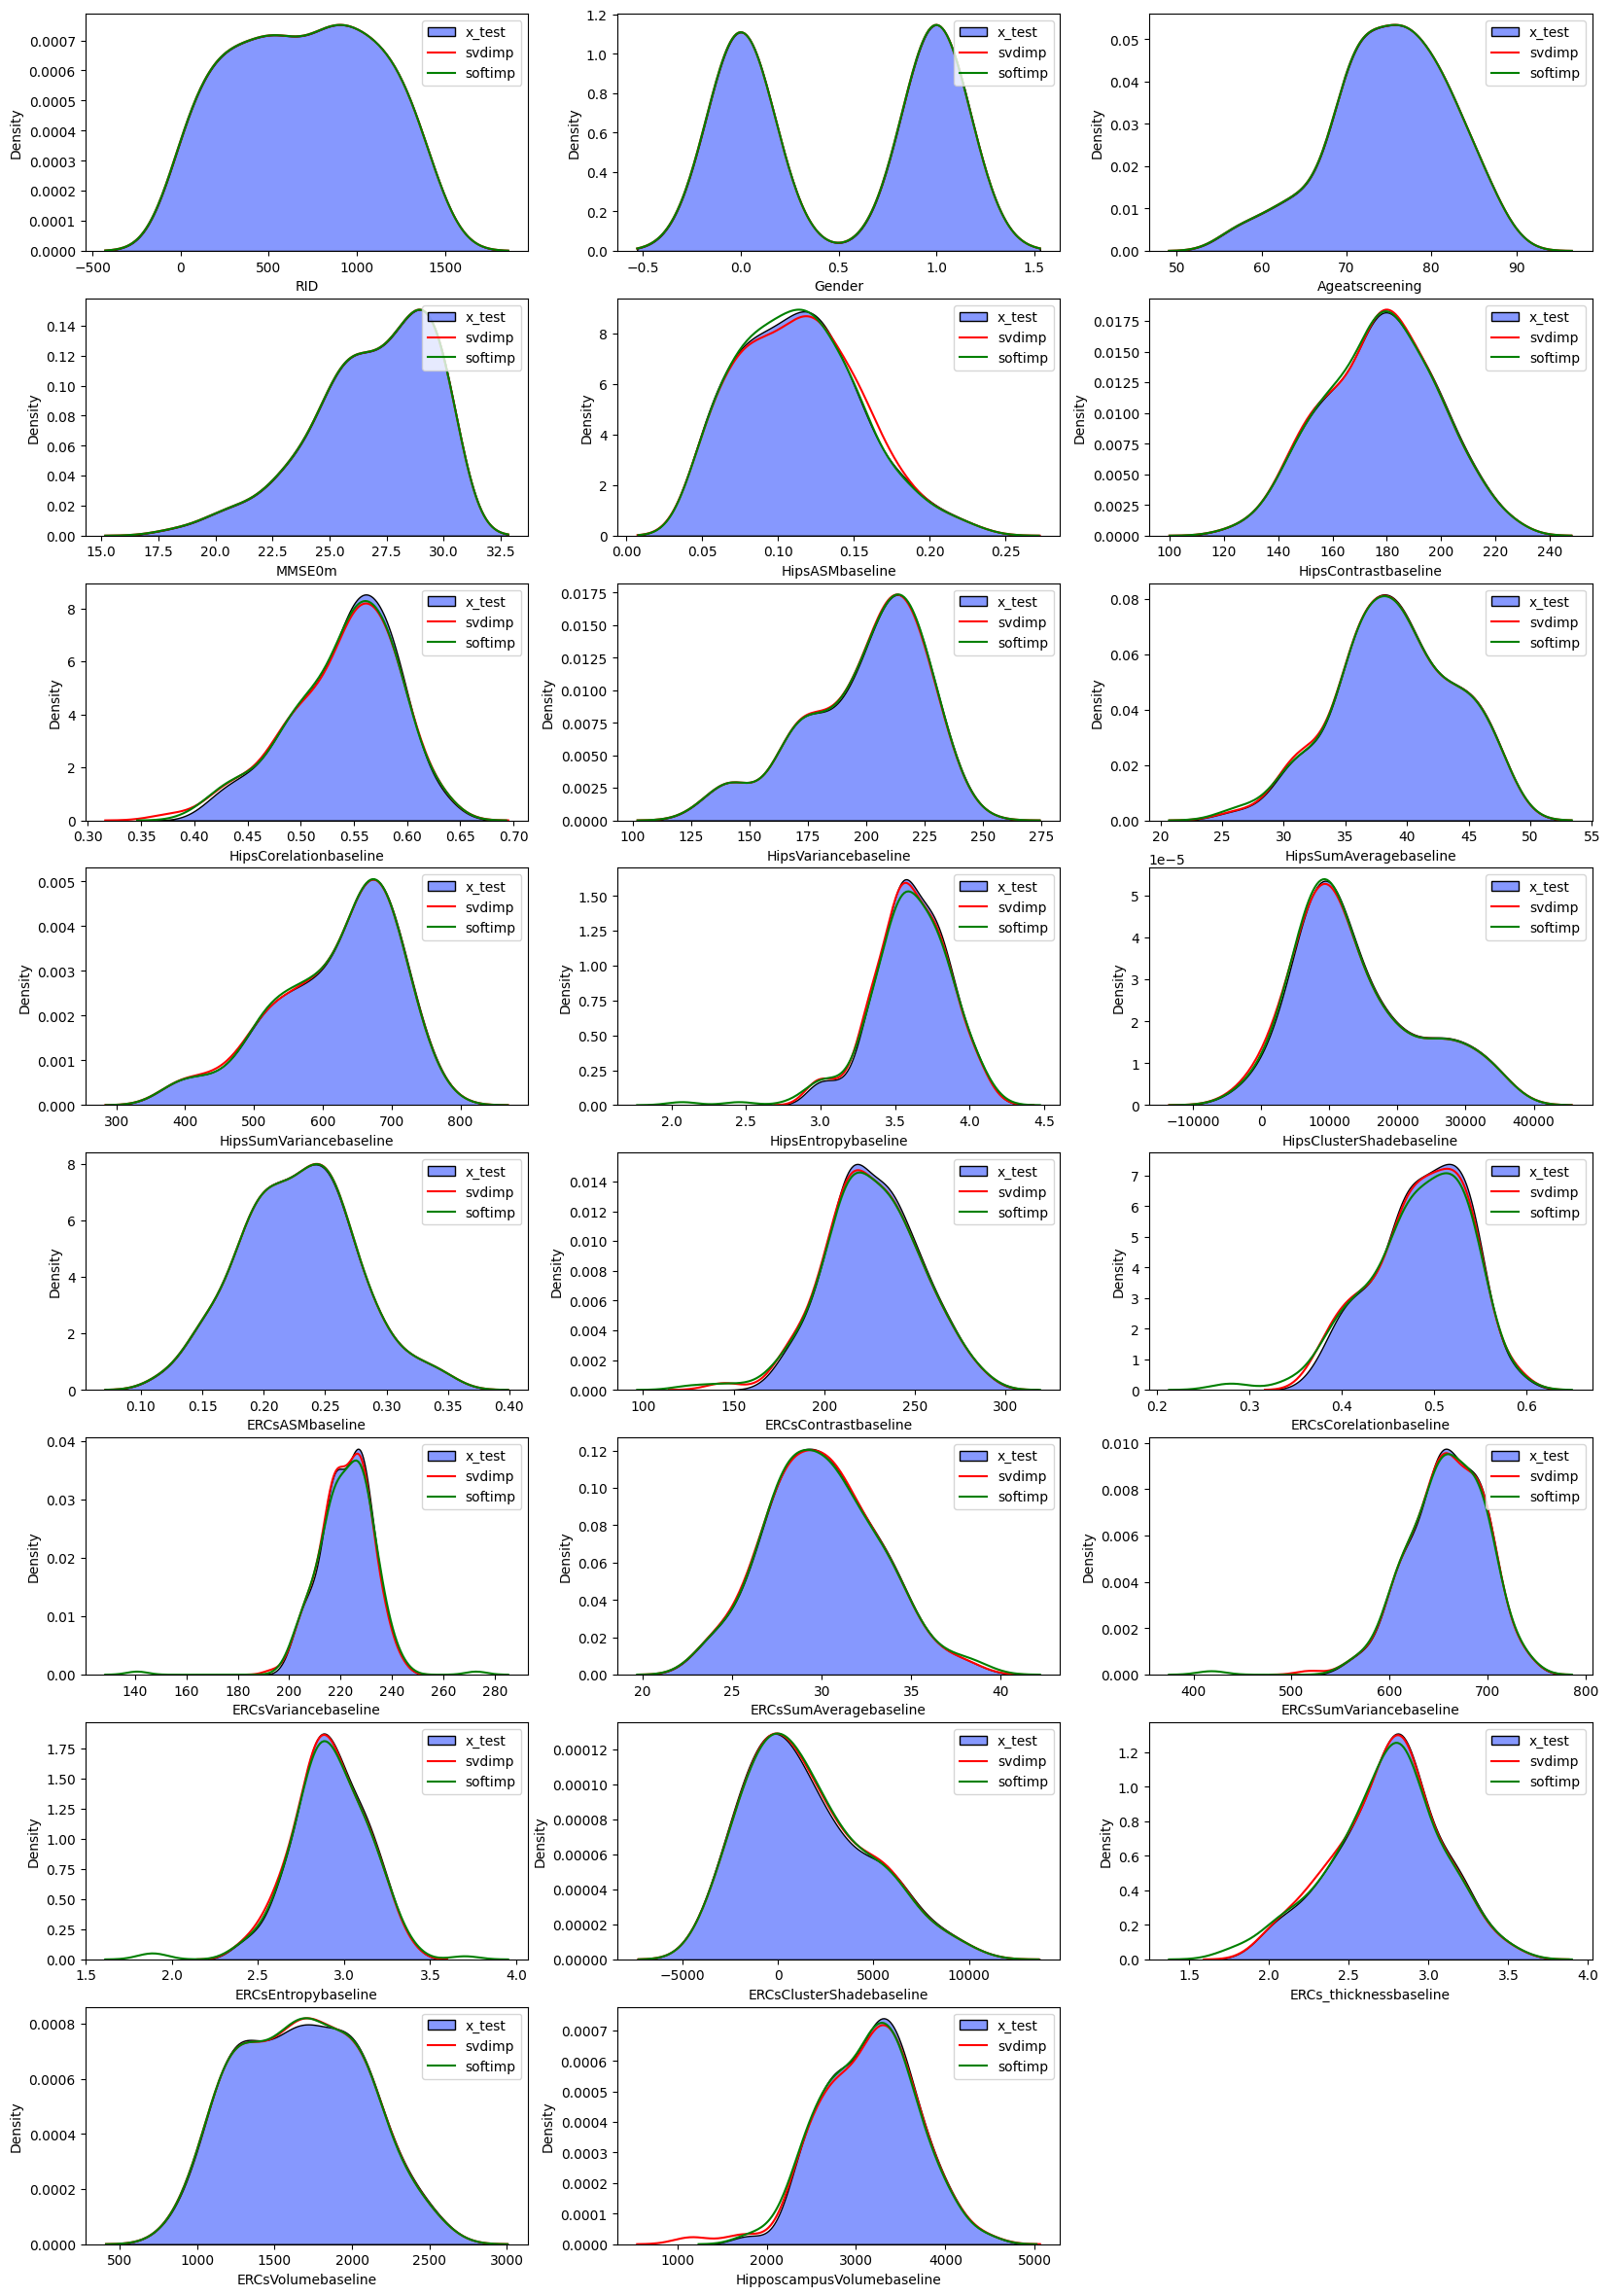

In [8]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test[X_test.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_imputed_svd[X_test_imputed_svd.columns[i]], color= "red")
    
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_imputed_sm[X_test_imputed_sm.columns[i]], color= "green")
    
    labels = ['x_test', 'svdimp', 'softimp']
    plt.legend(labels, loc='upper right')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np
import optuna
from functools import partial

def objective(trial, X_train_imputed, y_train):
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 50, 1000)
    rf_criterion = trial.suggest_categorical("rf_criterion", ["gini", "entropy"])
    rf_max_depth = trial.suggest_int("rf_max_depth", 1, 10)
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 20)  
    rf_max_features = trial.suggest_categorical("rf_max_features", ["sqrt", "log2", None])
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 5)
    rf_ccp_alpha = trial.suggest_float("rf_ccp_alpha", 0.0, 0.1)
    
    model = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        criterion=rf_criterion,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        max_features=rf_max_features,
        min_samples_leaf=rf_min_samples_leaf,
        ccp_alpha=rf_ccp_alpha,
        bootstrap=True,
        class_weight="balanced",
        random_state=42,
         n_jobs=-1,
    )
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, 
                         shuffle=True, 
                         random_state=42,
    )
    
    scores = cross_val_score(model, 
                             X_train_imputed, 
                             y_train, 
                             cv=cv, 
                             scoring="accuracy",
    )
    
    return scores.mean()

c:\Users\steve\Desktop\Notebooks\Thesis-Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
study_svd = optuna.create_study(
    direction = "maximize",
    sampler=optuna.samplers.TPESampler(
        n_startup_trials=10,
    ),
)

# Use partial to bind the dataset arguments
objective_with_data = partial(objective, X_train_imputed=X_train_imputed_svd, y_train=y_train)

# Optimize the study with 50 trials
study_svd.optimize(objective_with_data, n_trials=50)

[I 2025-01-03 15:41:57,556] A new study created in memory with name: no-name-822532e6-f914-41f5-a7cc-9b943afceb9c
[I 2025-01-03 15:42:20,033] Trial 0 finished with value: 0.6164705882352941 and parameters: {'rf_n_estimators': 618, 'rf_criterion': 'entropy', 'rf_max_depth': 8, 'rf_min_samples_split': 9, 'rf_max_features': 'sqrt', 'rf_min_samples_leaf': 3, 'rf_ccp_alpha': 0.06434735958402664}. Best is trial 0 with value: 0.6164705882352941.
[I 2025-01-03 15:42:47,818] Trial 1 finished with value: 0.5529411764705883 and parameters: {'rf_n_estimators': 839, 'rf_criterion': 'gini', 'rf_max_depth': 1, 'rf_min_samples_split': 14, 'rf_max_features': 'sqrt', 'rf_min_samples_leaf': 3, 'rf_ccp_alpha': 0.09271899136970417}. Best is trial 0 with value: 0.6164705882352941.
[I 2025-01-03 15:43:32,054] Trial 2 finished with value: 0.6235294117647059 and parameters: {'rf_n_estimators': 807, 'rf_criterion': 'entropy', 'rf_max_depth': 7, 'rf_min_samples_split': 15, 'rf_max_features': 'sqrt', 'rf_min_samp

In [28]:
best_params = study_svd.best_trial.params
best_params

{'rf_n_estimators': 934,
 'rf_criterion': 'gini',
 'rf_max_depth': 9,
 'rf_min_samples_split': 7,
 'rf_max_features': 'log2',
 'rf_min_samples_leaf': 2,
 'rf_ccp_alpha': 0.00041045680851841716}

In [29]:
best_params.get("rf_n_estimators")

934

In [30]:
study_svd.best_value

0.6517647058823529

In [31]:
hyperparameter_df = study_svd.trials_dataframe()

C:\Users\steve\AppData\Local\Temp\ipykernel_8100\1640654585.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study_svd)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

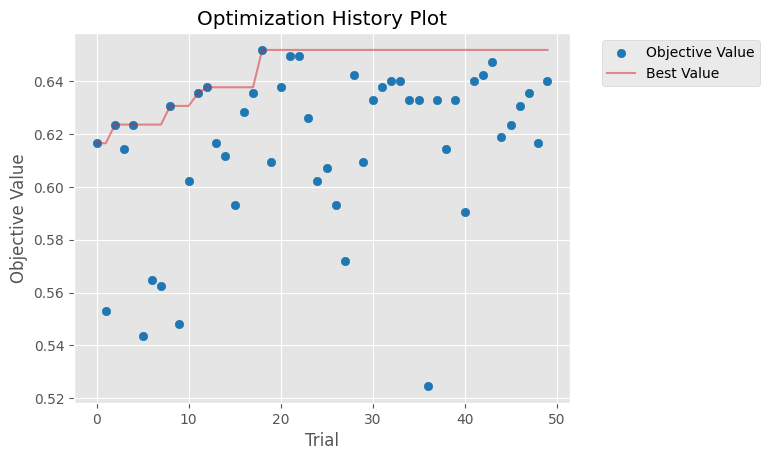

In [32]:
optuna.visualization.matplotlib.plot_optimization_history(study_svd)

C:\Users\steve\AppData\Local\Temp\ipykernel_8100\1450244847.py:1: ExperimentalWarning: plot_edf is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_edf([study_svd])


<Axes: title={'center': 'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

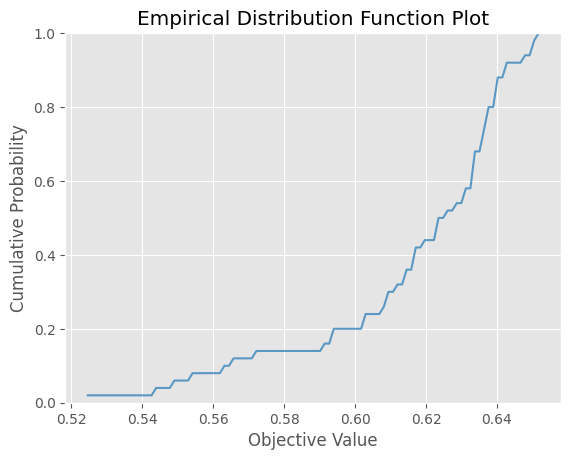

In [33]:
optuna.visualization.matplotlib.plot_edf([study_svd])

C:\Users\steve\AppData\Local\Temp\ipykernel_8100\1523536587.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study_svd)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

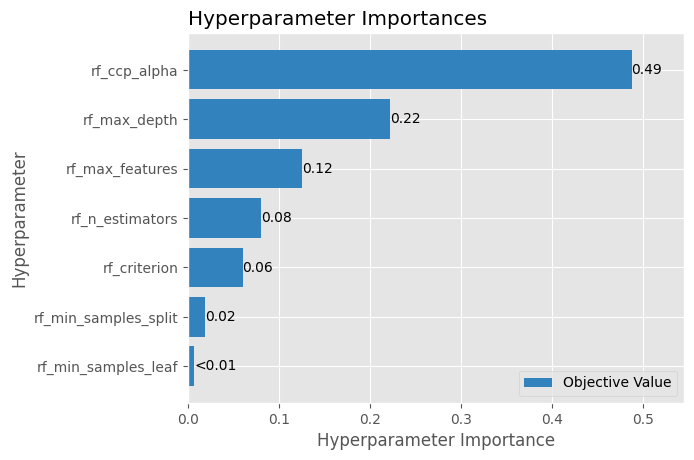

In [34]:
optuna.visualization.matplotlib.plot_param_importances(study_svd)

C:\Users\steve\AppData\Local\Temp\ipykernel_8100\3951050780.py:1: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_parallel_coordinate(


<Axes: title={'center': 'Parallel Coordinate Plot'}>

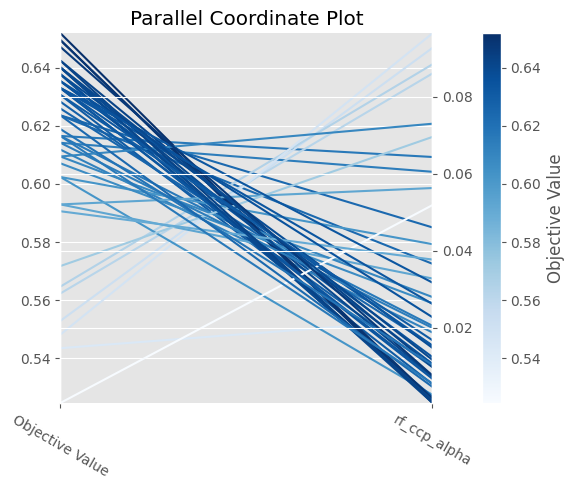

In [35]:
optuna.visualization.matplotlib.plot_parallel_coordinate(   
    study_svd,
    params=['rf_ccp_alpha'],
)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np

def run_random_forest(classifier_name, imp_method, best_params, X_train, y_train):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators = best_params.get("rf_n_estimators"),
                                    criterion = best_params.get("rf_criterion"),
                                    max_depth = best_params.get("rf_max_depth"),
                                    min_samples_split = best_params.get("rf_min_samples_split"),
                                    max_features = best_params.get("rf_max_features"),
                                    min_samples_leaf = best_params.get("rf_min_samples_leaf"),
                                    ccp_alpha = best_params.get("rf_ccp_alpha"),
                                    random_state = 42,
                                    class_weight = "balanced",
        )
        
        kf = StratifiedKFold(n_splits=5,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted"), 
                   "recall": make_scorer(recall_score, average="weighted"), 
                   "f1_weighted": make_scorer(f1_score, average="weighted"),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(rf,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [round(np.mean(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        std_train = [round(np.std(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        mean_test = [round(np.mean(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        std_test = [round(np.std(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        time = round(np.mean(cross_val_results[f"fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Fit Time": time,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = rf.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [37]:
svd_model, svd_metrics = run_random_forest("Random Forest", "IterSVD", best_params, X_train_imputed_svd, y_train)
soft_model, soft_metrics = run_random_forest("Random Forest", "SoftImpute", best_params, X_train_imputed_soft, y_train)

In [38]:
validation_df = pd.concat([svd_metrics, soft_metrics])
validation_df_report = validation_df.set_index(["Classifier", "Imputation", "Fit Time", "Metric"])
validation_df_report

Mean Train  Std Train  \
Classifier    Imputation Fit Time Metric                                        
Random Forest IterSVD    3.769    accuracy                   0.993      0.005   
                                  balanced_accuracy          0.994      0.005   
                                  precision                  0.993      0.005   
                                  recall                     0.993      0.005   
                                  f1_weighted                0.993      0.005   
                                  roc_auc_ovr_weighted       0.999      0.000   
              SoftImpute 2.688    accuracy                   0.990      0.007   
                                  balanced_accuracy          0.991      0.007   
                                  precision                  0.990      0.007   
                                  recall                     0.990      0.007   
                                  f1_weighted                0.990      0.007   
                                  roc_auc_ovr_weighted       0.999      0.000   

                                                        Mean Test  Std Test  
Classifier    Imputation Fit Time Metric                                     
Random Forest IterSVD    3.769    accuracy                  0.652     0.012  
                                  balanced_accuracy         0.576     0.013  
                                  precision                 0.637     0.017  
                                  recall                    0.652     0.012  
                                  f1_weighted               0.634     0.016  
                                  roc_auc_ovr_weighted      0.836     0.025  
              SoftImpute 2.688    accuracy                  0.647     0.021  
                                  balanced_accuracy         0.576     0.022  
                                  precision                 0.628     0.023  
                                  recall                    0.647     0.021  
                                  f1_weighted               0.630     0.018  
                                  roc_auc_ovr_weighted      0.838     0.028

In [39]:
validation_df.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/imputed_methods/matrix_base/validation_results.csv", index=False)

In [40]:
import time

def eval_random_forest(classifier_name, imp_method, model, X_train, X_test, y_train, y_test):
        
        start_time = time.time()
        # Get predicted probabilities for ROC AUC
        pred_train_proba = model.predict_proba(X_train)
        pred_test_proba = model.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        # Calculate metrics
        metrics_train = {
                "Accuracy": round(accuracy_score(y_train, pred_train), 3),
                "Balanced Accuracy": round(balanced_accuracy_score(y_train, pred_train), 3),
                "Precision": round(precision_score(y_train, pred_train, average="weighted"), 3),
                "Recall": round(recall_score(y_train, pred_train, average="weighted"), 3),
                "F1-Score": round(f1_score(y_train, pred_train, average="weighted"), 3),
                "ROC-AUC": round(roc_auc_score(y_train, pred_train_proba, average="weighted", multi_class="ovr"),3,),
        }
        
        metrics_test = {
                "Accuracy": round(accuracy_score(y_test, pred_test), 3),
                "Balanced Accuracy": round(balanced_accuracy_score(y_test, pred_test), 3),
                "Precision": round(precision_score(y_test, pred_test, average="weighted"), 3),
                "Recall": round(recall_score(y_test, pred_test, average="weighted"), 3),
                "F1-Score": round(f1_score(y_test, pred_test, average="weighted"), 3),
                "ROC-AUC": round(roc_auc_score(y_test, pred_test_proba, average="weighted", multi_class="ovr"),3,),
        }
                
        elapsed_time = time.time() - start_time
    
        # Create the DataFrame without additional rounding
        pred_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Classification Time": round(elapsed_time, 3),
                "Metric": metrics_train.keys(),
                "Train data": metrics_train.values(),
                "Test data": metrics_test.values(),
    })
        
        return pred_metrics_df

In [41]:
pred_svd = eval_random_forest("Random Forest", "IterSVD", svd_model, X_train_imputed_svd, X_test_imputed_svd, y_train, y_test)
pred_soft = eval_random_forest("Random Forest", "SoftImpute", soft_model, X_train_imputed_soft, X_test_imputed_soft, y_train, y_test)

In [43]:
prediction_df = pd.concat([pred_svd, pred_soft])
prediction_df_report = prediction_df.set_index(["Classifier", "Imputation",	"Classification Time", "Metric"])
prediction_df_report

Train data  \
Classifier    Imputation Classification Time Metric                          
Random Forest IterSVD    0.467               Accuracy                0.984   
                                             Balanced Accuracy       0.987   
                                             Precision               0.984   
                                             Recall                  0.984   
                                             F1-Score                0.983   
                                             ROC-AUC                 0.999   
              SoftImpute 0.381               Accuracy                0.984   
                                             Balanced Accuracy       0.987   
                                             Precision               0.984   
                                             Recall                  0.984   
                                             F1-Score                0.983   
                                             ROC-AUC                 0.999   

                                                                Test data  
Classifier    Imputation Classification Time Metric                        
Random Forest IterSVD    0.467               Accuracy               0.563  
                                             Balanced Accuracy      0.554  
                                             Precision              0.558  
                                             Recall                 0.563  
                                             F1-Score               0.551  
                                             ROC-AUC                0.827  
              SoftImpute 0.381               Accuracy               0.579  
                                             Balanced Accuracy      0.570  
                                             Precision              0.573  
                                             Recall                 0.579  
                                             F1-Score               0.567  
                                             ROC-AUC                0.829

In [44]:
prediction_df.to_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/processed/imputed_methods/matrix_base/prediction_results.csv", index=False)